In [2]:
import json
import pandas as pd
import numpy as np
import os, sys
import re
import emoji
from datetime import datetime
import string
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import advertools as adv
from nltk.corpus import stopwords
from nltk import word_tokenize
#nltk.download('stopwords')
import wordcloud
import reldi

In [6]:
file = '/home/maja/Downloads/Telegram Desktop/DataExport_13_01_2021/result.json'
with open(file) as data_file:
    data = json.load(data_file)

In [7]:
df_all_chats = pd.json_normalize(data['chats']['list'])

In [8]:
df_1_name = df_all_chats[df_all_chats['name'] == 'T Berliner']

In [9]:
df_1_name = pd.concat([pd.DataFrame(pd.json_normalize(x)) for x in df_1_name['messages']], ignore_index=True)

In [10]:
df_1_name = df_1_name[['id', 'date', 'from_id', 'from', 'text']]

In [11]:
df_1_name.head(5)

,id,date,from_id,from,text
0,498705,2017-03-26T16:28:58,289047825.0,T Berliner,cemo djir
1,498706,2017-03-26T16:28:59,289047825.0,T Berliner,poziv?
2,498707,2017-03-26T16:29:11,38814420.0,Maja,Je moze malo kaanije
3,498708,2017-03-26T16:29:21,289047825.0,T Berliner,za pol sata?
4,498709,2017-03-26T16:29:41,38814420.0,Maja,Uh


In [12]:
df_1_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639501 entries, 0 to 639500
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       639501 non-null  int64  
 1   date     639501 non-null  object 
 2   from_id  638298 non-null  float64
 3   from     486222 non-null  object 
 4   text     639501 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 24.4+ MB


In [13]:
df_1_name['from'].unique()

array(['T Berliner', 'Maja', nan, None], dtype=object)

In [14]:
df_1_name['from_id'].unique()

array([2.89047825e+08, 3.88144200e+07,            nan, 3.75702530e+07,
       1.91824226e+08])

In [15]:
df_1_name['from_id'].isnull().sum()

1203

In [16]:
df_1_name[df_1_name['from_id'].isnull()]

,id,date,from_id,from,text
713,501408,2017-04-03T23:43:24,NaN,NaN,
1868,503222,2017-04-05T19:53:06,NaN,NaN,
1869,503223,2017-04-05T20:18:11,NaN,NaN,
1870,503224,2017-04-05T20:28:54,NaN,NaN,
1933,503291,2017-04-06T00:21:17,NaN,NaN,
...,...,...,...,...,...
291741,954625,2020-12-08T19:21:14,NaN,NaN,
292039,955273,2020-12-22T11:32:21,NaN,NaN,
611303,405570,2016-10-03T23:38:36,NaN,NaN,
611654,405975,2016-10-04T19:19:18,NaN,NaN,


In [17]:
df_1_name = df_1_name.dropna(subset=['from_id'])

2021-02-03 16:36:51,960 | INFO | utils.py:141 | _init_num_threads | NumExpr defaulting to 4 threads.


In [18]:
df_1_name = df_1_name.astype({'from_id': 'int64'})
df_1_name['time'] = pd.to_datetime(df_1_name['date']).apply(lambda x: x.time())
df_1_name['date'] = pd.to_datetime(df_1_name['date']).apply(lambda x: x.date())

In [19]:
df_1_name = df_1_name[['id', 'date', 'time', 'from_id', 'from', 'text']]

In [20]:
df_1_name['from_id'].value_counts()

38814420     354645
37570253     148177
289047825    131577
191824226      3899
Name: from_id, dtype: int64

In [21]:
df_1_name['from'] = df_1_name['from'].fillna('T Berliner')

In [22]:
df_1_name[['from_id', 'from']].value_counts()

from_id    from      
38814420   Maja          354645
37570253   T Berliner    148177
289047825  T Berliner    131577
191824226  T Berliner      3899
dtype: int64

In [23]:
df_1_name['from'].value_counts()

Maja          354645
T Berliner    283653
Name: from, dtype: int64

In [24]:
df_1_name['date'].min()

datetime.date(2014, 3, 6)

In [25]:
df_1_name['date'].value_counts().head(10)

2015-10-09    2431
2016-04-01    1934
2014-06-02    1775
2019-08-03    1757
2017-06-27    1584
2014-06-11    1563
2016-05-16    1494
2018-09-03    1465
2014-09-25    1450
2015-03-18    1440
Name: date, dtype: int64

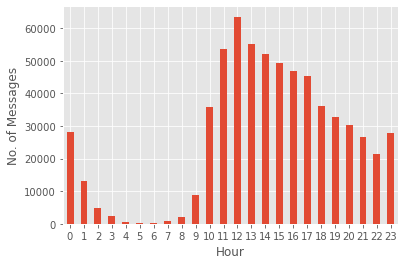

In [26]:
%matplotlib inline
plt.grid(True)
pd.Series([x.hour for x in df_1_name['time']]).value_counts().sort_index().plot.bar()
plt.xlabel('Hour')
plt.ylabel('No. of Messages')
plt.xticks(rotation=0)
plt.show()

In [46]:
messages = pd.Series(df_1_name['text'].tolist()).astype(str).str.lower()

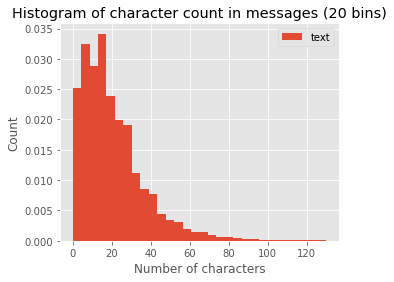

In [28]:
plt.figure(figsize=(5,4))
plt.hist(messages.apply(len), bins=30, density=True, range=[0,130], label='text')
plt.title('Histogram of character count in messages (20 bins)')
plt.legend()
plt.xlabel('Number of characters')
plt.ylabel('Count')
plt.show()

In [29]:
messages.apply(lambda x: len(x.split(' '))).max()

694

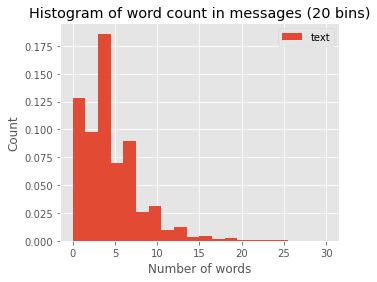

In [30]:
plt.figure(figsize=(5,4))
plt.hist(messages.apply(lambda x: len(x.split(' '))), bins=20, density=True, range=[0,30], label='text')
plt.title('Histogram of word count in messages (20 bins)')
plt.legend()
plt.xlabel('Number of words')
plt.ylabel('Count')
plt.show()

In [47]:
messages = messages.str.replace('[{}]'.format(string.punctuation), '')

In [48]:
messages_string = ' '.join(messages)

In [50]:
f = open('text.txt', 'a')
f.write(messages_string)
f.close()

In [52]:
restore_all.py

NameError: name 'restore_all' is not defined

In [36]:
file = '/home/maja/Documents/Maja/Projects/Chat Analysis/stopwords-hr.txt'
with open(file, 'r') as stopwords_hr:
    stopwords_hr = stopwords_hr.read().split()

In [37]:
words = ' '.join(messages).split()

In [ ]:
clean_text = [word for word in words if word not in stopwords_hr]
clean_text

In [39]:
messages_string = ' '.join(clean_text)

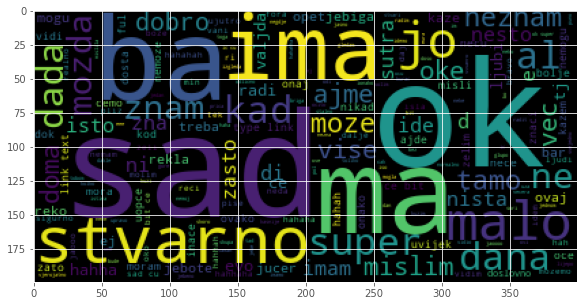

In [40]:
messages_cloud = wordcloud.WordCloud().generate(messages_string)
plt.figure(figsize=(10,5))
plt.imshow(messages_cloud)

#### 2. Text cleanup

In [315]:
stoplist = stopwords.words('english') + list(string.punctuation)
stoplist = set(stoplist)
#tokenized = [word for word in word_tokenize(df_1_name['text']) if word.lower() not in stoplist and not word.isdgit()]
#words = lowercase.str.lower()
#table = str.maketrans('', '', string.punctuation)
#stripped_words = [w.translate(table) for w in words]
#print(stripped_words[:100])
#tokenized

In [85]:
emoji = re.compile(u'[\U00010000-\U0010ffff]')
emojis = [text for text in str(df['text']) if emoji.search(text)]

In [158]:
[emo for emo in df_1_name['text'] if emo in emoji.UNICODE_EMOJI]

TypeError: unhashable type: 'list'

In [160]:
emoji.UNICODE_EMOJI

{'🥇': ':1st_place_medal:',
 '🥈': ':2nd_place_medal:',
 '🥉': ':3rd_place_medal:',
 '🆎': ':AB_button_(blood_type):',
 '🏧': ':ATM_sign:',
 '🅰': ':A_button_(blood_type):',
 '🅰️': ':A_button_(blood_type)_selector:',
 '🇦🇫': ':Afghanistan:',
 '🇦🇽': ':Aland_Islands:',
 '🇦🇱': ':Albania:',
 '🇩🇿': ':Algeria:',
 '🇦🇸': ':American_Samoa:',
 '🇦🇩': ':Andorra:',
 '🇦🇴': ':Angola:',
 '🇦🇮': ':Anguilla:',
 '🇦🇶': ':Antarctica:',
 '🇦🇬': ':Antigua_&_Barbuda:',
 '♒': ':Aquarius:',
 '🇦🇷': ':Argentina:',
 '♈': ':Aries:',
 '🇦🇲': ':Armenia:',
 '🇦🇼': ':Aruba:',
 '🇦🇨': ':Ascension_Island:',
 '🇦🇺': ':Australia:',
 '🇦🇹': ':Austria:',
 '🇦🇿': ':Azerbaijan:',
 '🔙': ':BACK_arrow:',
 '🅱': ':B_button_(blood_type):',
 '🅱️': ':B_button_(blood_type)_selector:',
 '🇧🇸': ':Bahamas:',
 '🇧🇭': ':Bahrain:',
 '🇧🇩': ':Bangladesh:',
 '🇧🇧': ':Barbados:',
 '🇧🇾': ':Belarus:',
 '🇧🇪': ':Belgium:',
 '🇧🇿': ':Belize:',
 '🇧🇯': ':Benin:',
 '🇧🇲': ':Bermuda:',
 '🇧🇹': ':Bhutan:',
 '🇧🇴': ':Bolivia:',
 '🇧🇦': ':Bosnia_&_Herzegovina:',
 '🇧🇼': ':Botswana

In [66]:
#chars = [string for string in df['text']]
#emoji = [emo for emo in chars if emo in emoji.UNICODE_EMOJI]
def char_is_emoji(char):
    return char in emoji.UNICODE_EMOJI

In [68]:
[c for c in df['text'] if char_is_emoji(c)]

TypeError: unhashable type: 'list'

In [ ]:
def

In [50]:
a = advertools.emoji.extract_emoji()

AttributeError: 'list' object has no attribute 'lower'